# DEVOIR MAISON COMPARAISON ALGORITME D'OPTIMISATION : 

## sommaire :

- INTRO

- TD4
    - EXERCICE 4
    - EXERCICE 5
    - EXERCICE 7

- TD6 EXERCICE 1

- TD7 EXERCICE 1

- COMPARAISON

- CONCLUSION

## INTRO :

pour la cuite de ce DM je vais avoir besoin de plusieur biblotéque comme numpy et matplotlib :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D


je vais aussi avoir besoin de plusieur fonction qui vont me servir tout au lont du TD pour que je puisse les appeler tout au lont des exercice :

- code pour la fonction des exemple de l'exercice 4 :

In [3]:
M = np.random.randint(1, 11)
n = 1000
def f(x):
    return x**2

def df(x):
    return 2*x

xk = np.random.randint(1,11)
Dfk = df(xk)
norm_fk_2 = Dfk**2
M = 2                            # comme la dérivée seconde est une constante qui est egale a 2*A
alpha = 0.5
t = np.linspace(0, 1/M+(0.2*(1/M)), n)

## TD4 :

### EXERCICE 4 :

#### QUESTION 1 :

on veut montrer que $\forall t \in [0, 1/M], \frac{M}{2}t^2 - t \leq \frac{-t}{2}$ cela est équivalent à : 
$$ \frac{M}{2}t^2 - t \leq \frac{-t}{2} \iff \frac{M}{2}t^2 \leq \frac{t}{2} \iff \frac{M}{2}t \leq \frac{1}{2} $$

comme t > 0 cela ne change pas le sens de l'inégaliter. De plus M est constant donc le membre de droite est une fonction linéaire de la forme $ A t  \forall t  \in [0,1/M]$ avec $A =  \frac{M}{2}$ donc il suffit de regarder les borne de t et pour ca on a : 
$$ t = 0 \implies \frac{M}{2}t = 0 \leq \frac{1}{2} $$
$$ t = \frac{1}{M} \implies \frac{M}{2}t = \frac{1}{2} \leq \frac{1}{2} $$

donc l'iégaliter est bien vérifier et on a bien $\forall t \in [0, 1/M], \frac{M}{2}t^2 - t \leq \frac{-t}{2}$

on peut le tester via le code :

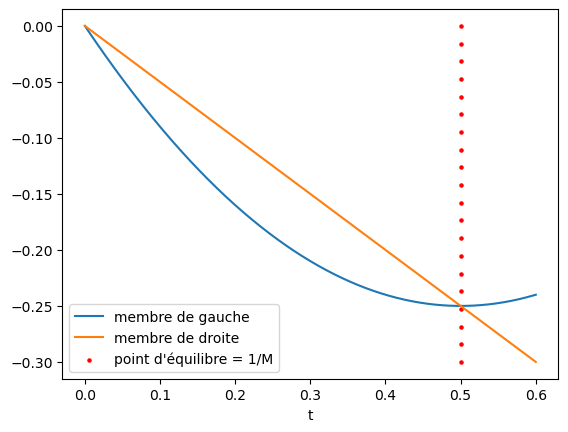

In [4]:
debug = False
Pg = []
Pd = []
for k in t:
    Pg.append((M/2)*(k**2)-k)
    Pd.append(-k/2)
tM_sur_2 = np.full(20, 1/M)
M_sur_2 = np.linspace(0, min(Pd), 20)
plt.plot(t, Pg, label='membre de gauche')
plt.plot(t, Pd, label='membre de droite')
plt.scatter(tM_sur_2, M_sur_2, color="red", label="point d'équilibre = 1/M", s=5)
plt.xlabel('t')
plt.legend()
plt.show()
if debug == True :
    print(Pg)
    print(Pd)
    print (M)

#### QUESTION 2 :

on veut en déduire $f(x^{(k)} - t\nabla f(x^{(k)})) \le f(x^{(k)}) - \alpha t \|\nabla f(x^{(k)})\|^2$ pour cela on va utiliser le théorème de convergence démontrer dans la question 1 de l'exercice 2 qui donne : 
$$f(y) \le f(x^{(k)}) + \langle \nabla f(x^{(k)}), y - x^{(k)} \rangle + \frac{M}{2} \| y - x^{(k)} \|^2$$
comme y est le prochain point que l'on atteint on a $ y = x^k -t\nabla f(x^k) $ on peut remplacer $ y - x^k = -t\nabla f(x^k)$ ce qui nous donne 
$$ f(y) \le f(x^{(k)}) + \langle \nabla f(x^{(k)}), -t\nabla f(x^k) \rangle + \frac{M}{2} \| -t\nabla f(x^k)\|^2 \iff f(x^k) -t \| \nabla f(x^k) \|^2 + \frac{M}{2}t^2 \| \nabla f(x^k) \|^2 $$

en factorisant par $\| \nabla f(x^k) \|^2 $ on optient : 
$$f(y) \le f(x^{(k)}) + \left( \frac{M}{2}t^2 - t \right) \|\nabla f(x^{(k)})\|^2$$

or comme $\forall t \in [0, 1/M], \frac{M}{2}t^2 - t \leq \frac{-t}{2}$ on a :

$$f(y) \le f(x^{(k)}) + \left( \frac{M}{2}t^2 - t \right) \|\nabla f(x^{(k)})\|^2 \le f(x^{(k)}) - \frac{t}{2} \|\nabla f(x^{(k)})\|^2$$

soit $ \alpha = \frac{1}{2} $ on a bien : $f(x^{(k)} - t\nabla f(x^{(k)})) \le f(x^{(k)}) - \alpha t \|\nabla f(x^{(k)})\|^2$ 

on peut l'ilustrer avec du code python et une fonction simple comme le fonction $x^2$ :

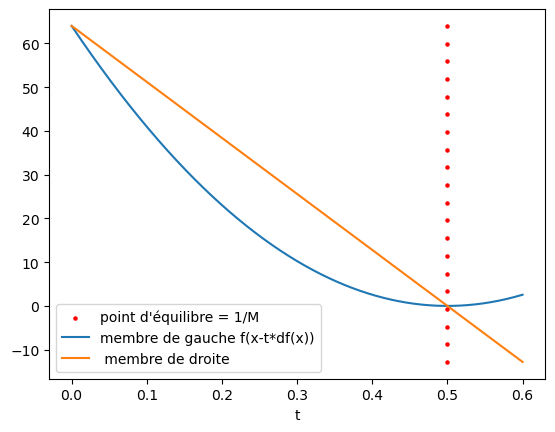

In [5]:
# membre de gauche f(x-t*df(x))

fg= f(xk - t*df(xk))

# membre de droite f(x) - alpha*t*||grad||^2
fd = f(xk) -alpha*t*norm_fk_2

tM_sur_2 = np.full(20, 1/M)
M_sur_2 = np.linspace(max(fd), min(fd), 20)
plt.scatter(tM_sur_2, M_sur_2, color="red", label="point d'équilibre = 1/M", s=5)
plt.plot(t, fg, label='membre de gauche f(x-t*df(x))')
plt.plot(t, fd, label= " membre de droite")
plt.xlabel("t")
plt.legend()


#### QUESTION 3 :

comme t commence à 1 et on note $t^k$ l'élément k de la suite de point décroisant génaré par l'algoritme de descente par rebroussemnt on va faire une distinction de cas :
- si le minimum est a l'origine alors l'algoritme s'arret pour pour $k^0$ soit pour 1 et on ne rentre pas dans la boucle while 

- si on rentre dans la boucle while alors on peut noter $t^n$ le dernier argument de la boucle et donc $ t^n = \beta t^{n-1}$ donc  $t^{n-1} = \frac{f^n}{\beta}$ et comme on a montrer que l'algoritme continue temps que $t \leq \frac{1}{M}$  donc comme l'algoritme a continue jusqu'a n on sait que pour $t^{n-1}$ on etait encore au decu on a donc 
$$ t^{n-1} \geq \frac{1}{M} \iff \frac{t^n}{\beta} \ge \frac{1}{M} $$
en multipliant par $\beta$ on a bient que la mèthode s'arrête pour $t^(K) \geq \frac{\beta}{M}$

pour la preuve par le code il suffit de regarder le graphique precedent 

#### QUESTION 4 :

on sait que l'algoritme assure que le pas doit permettre : 
$$f(x^{(k+1)}) \le f(x^{(k)}) - \alpha t^{(k)} \|\nabla f(x^{(k)})\|^2$$
de plus on sait grace a la question 3 que $t^{(k)} \geq min(1,\frac{\beta}{M})$ donc le temps d'arret est si $t^{(k)} = min(1, \frac{\beta}{M})$ et on injecte dans l'équation :
$$f(x^{(k+1)}) \le f(x^{(k)}) - \alpha \min\left(1, \frac{\beta}{M}\right) \|\nabla f(x^{(k)})\|^2 \iff f(x^{(k)}) - \min\left(\alpha, \frac{\alpha\beta}{M}\right) \|\nabla f(x^{(k)})\|^2$$

on peut le verifier par le code avec la même fonction que la question 2 :

le coefficient théorique est : 0.105
la solution est :  0.00010485760000000023 avec un nombre d'itération de :  9


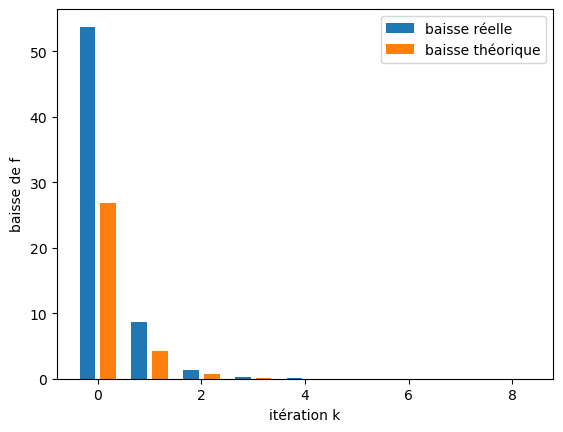

In [6]:
debug = False
alpha = 0.3
beta = 0.7
x = xk
coef_theorique = min(alpha, (alpha*beta)/M)
print("le coefficient théorique est :", coef_theorique)
itération = []
f_reel = []
baisse_reel = []
baisse_theorique = []
x_reel = []
k= 0

while norm_fk_2 > 1e-6 and k < 100:
    g = df(x)
    norm_fk_2 = g**2

    t=1
    while f(x - t*g) > f(x)- alpha*t*norm_fk_2:
        t = beta*t
    x_new = x-t*g
    baisse_reel.append(f(x)-f(x_new))
    baisse_theorique.append(coef_theorique*norm_fk_2)
    itération.append(k)
    f_reel.append(f(x))
    x_reel.append(x)
    k += 1
    x = x_new

if debug == True:
    print(itération)
    print(x_reel)
    print(f_reel)
    print(baisse_reel)
    print(baisse_theorique)

if k == 100:
    print("nombre d'itération max atteint et la norme du gradient est de : ", norm_fk_2)
else:
    print("la solution est : ", x, "avec un nombre d'itération de : " ,k)

plt.bar(np.array(itération)-0.2, baisse_reel, width=0.3, label="baisse réelle")
plt.bar(np.array(itération)+0.2, baisse_theorique, width=0.3, label="baisse théorique")
plt.xlabel("itération k")
plt.ylabel("baisse de f")
plt.legend()
plt.show()

### EXERCICE 5 :

on definit $f(x) : R^n \to R$ comme $f(x) = \frac{1}{2}<Ax,x>-<b,x>+c $ avec A une matrice, b un vecteur et c une constante 

#### QUESTION 1 :

on a donc $\nabla f(x) = Ax - b$ et $\nabla^2 f(x) = A$

#### QUESTION 2 :

il faut que la fonction soit convexe et donc que A soit défini possitif  et symetrique et donc f est coercive

#### QUESTION 3:

In [7]:
def g(x,A,b,c):
    return 0.5*(x.T @ A @ x) - (b.T @ x)+ c

def grad_g(x,A,b):
    return A @ x -b

#### QUESTION 4 :

pour une fonction quadratique le pas optimale est noté $t^{*}$ pour ca on a besoint de $d = -\nabla f(x)$ et on a :
$$t^* = \frac{\|d\|^2}{\langle Ad, d \rangle} \text{ ou } t^* = \frac{\|\nabla f(x)\|^2}{\langle A\nabla f(x), \nabla f(x)\rangle}$$

#### QUESTION 5 :

In [8]:
def desc_gradient_fquadra(x0, eps,A, f, grad_f):
    max_iter = 10000
    x = np.array(x0).reshape(-1,1)
    Xk = [x]
    FXk = [f(x)]

    for k in range(max_iter):
        grad = grad_f(x)
        norm_grad = np.linalg.norm(grad)

        if norm_grad < eps:
            print("f converge a l'itération",k)
            break

        t_sup = grad.T @ grad
        t_inf = grad.T @ A @ grad

        if t_inf <= 1e-10:
            break

        t = t_sup / t_inf
        x = x - t*grad
        Xk.append(x)
        FXk.append(f(x))
    return Xk, FXk

#### QUESTION 6 :

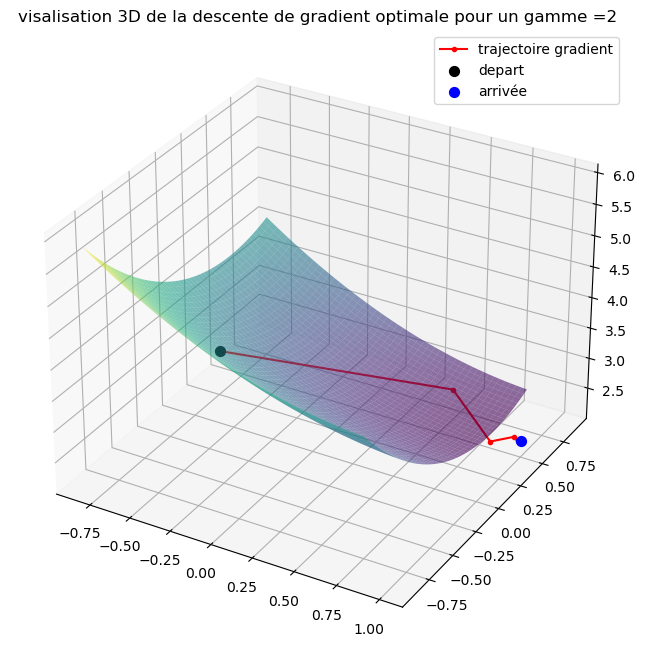

f converge a l'itération 7


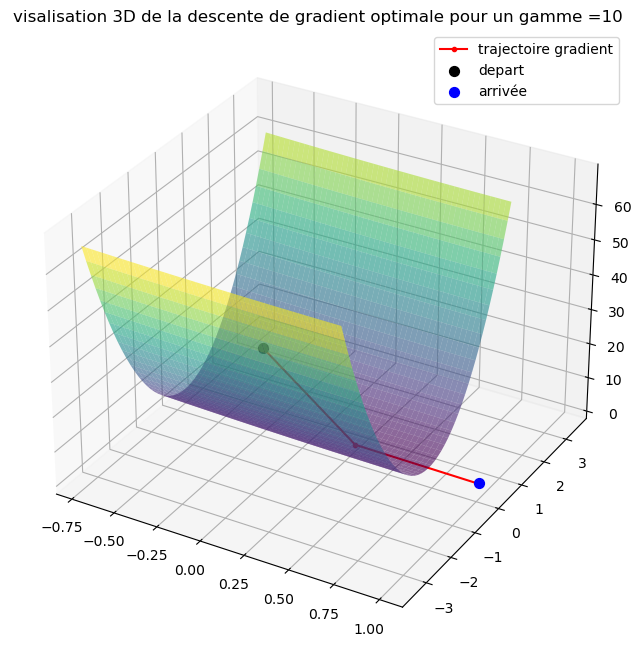

In [9]:
  
debug = False
Gamma = [2,10]
for gamma in Gamma:
    A=np.array([[1,0],[0,gamma]])
    b = np.array([[1],[1]])
    c=3
    x0 = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    epsilon = 1e-6

    Xk, FXk = desc_gradient_fquadra(x0, epsilon,A, f=lambda x: g(x,A,b,c), grad_f=lambda x: grad_g(x,A,b) )
    Xk = np.array(Xk).squeeze()
    FXk = np.array(FXk).flatten()
    if debug == True:
        print("la solution est :", Xk[-1])
        print("solution théorique :", np.linalg.solve(A,b))
        print("erreur :",abs(Xk[-1]-np.linalg.solve(A,b)))
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    #creation du maillage
    x_range = np.linspace(-abs(x0[0])-0.5,abs(x0[0])+0.5,50)
    y_range = np.linspace(-abs(x0[1])-0.5,abs(x0[1])+0.5,50)
    X,Y = np.meshgrid(x_range, y_range)

    # calcul de g sur le plan
    # comme A est diagonale on a que des terme carrée pour a et des terme simple pour b
    Z = 0.5*(A[0,0]*X**2+A[1,1]*Y**2)-(b[0]*X+b[1]*Y)+c

    #surface:
    surf= ax.plot_surface(X,Y,Z, cmap='viridis', alpha=0.6)
    ax.plot(Xk[:,0],Xk[:,1], FXk, color='red', marker='.', label='trajectoire gradient')
    ax.scatter(Xk[0,0],Xk[0,1], FXk[0], color='black', s=50, label='depart')
    ax.scatter(Xk[-1,0],Xk[-1,1], FXk[-1], color='blue', s=50, label='arrivée')

    ax.set_title(f"visalisation 3D de la descente de gradient optimale pour un gamme ={gamma}")
    ax.legend()
    ax.view_init(elev=30,azim=-60)

    plt.show()

#### QUESTION 7 :

f converge a l'itération 17


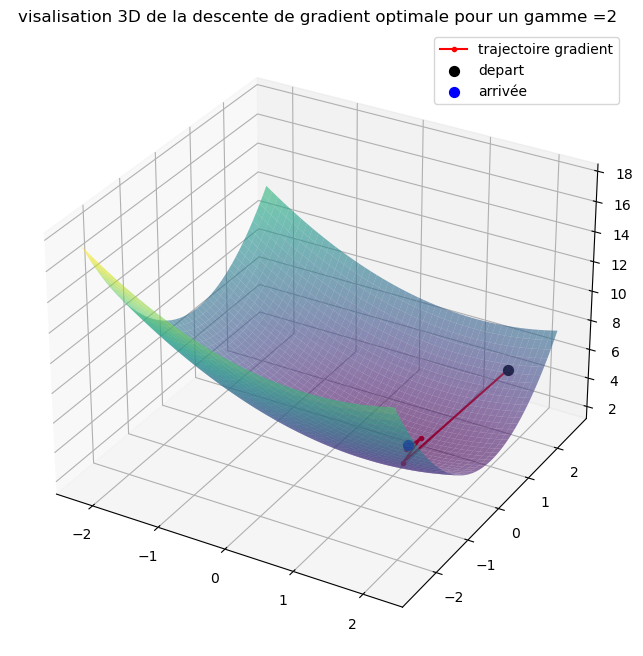

f converge a l'itération 79


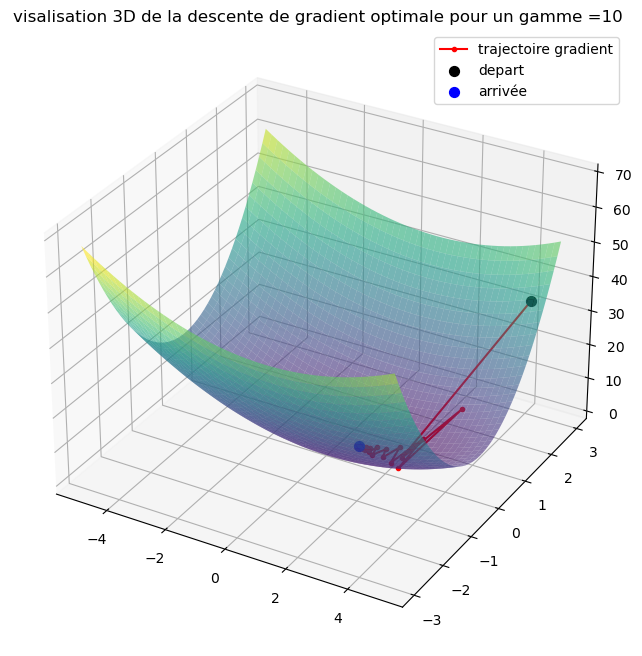

In [10]:
def desc_gradient_reb(x0, eps, alpha, beta, f, gradf):
    max_iter = 10000
    x = np.array(x0).reshape(-1,1)
    Xk = [x]
    FXk = [f(x)]

    for k in range(max_iter):
        grad = gradf(x)
        norm_grad = np.linalg.norm(grad)

        if norm_grad < eps:
            print("f converge a l'itération",k)
            break

        t=1
        while f(x - t*grad) > f(x)- alpha*t*norm_grad**2:
            t = beta*t
            if t< 1e-10: break
        
        x = x - t*grad
        Xk.append(x)
        FXk.append(f(x))
    return Xk, FXk

alpha = 0.1
beta = 0.7
debug = False
Gamma = [2,10]
for gamma in Gamma:
    A=np.array([[1,0],[0,gamma]])
    b = np.array([[1],[1]])
    c=3
    x0 = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    epsilon = 1e-6

    Xk, FXk = desc_gradient_reb(x0, epsilon, alpha, beta, f=lambda x: g(x,A,b,c), gradf=lambda x: grad_g(x,A,b) )
    Xk = np.array(Xk).squeeze()
    FXk = np.array(FXk).flatten()
    if debug == True:
        print("la solution est :", Xk[-1])
        print("solution théorique :", np.linalg.solve(A,b))
        print("erreur :",abs(Xk[-1]-np.linalg.solve(A,b)))
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    #creation du maillage
    x_range = np.linspace(-abs(x0[0])-0.5,abs(x0[0])+0.5,50)
    y_range = np.linspace(-abs(x0[1])-0.5,abs(x0[1])+0.5,50)
    X,Y = np.meshgrid(x_range, y_range)

    # calcul de g sur le plan
    # comme A est diagonale on a que des terme carrée pour a et des terme simple pour b
    Z = 0.5*(A[0,0]*X**2+A[1,1]*Y**2)-(b[0]*X+b[1]*Y)+c

    #surface:
    surf= ax.plot_surface(X,Y,Z, cmap='viridis', alpha=0.6)
    ax.plot(Xk[:,0],Xk[:,1], FXk, color='red', marker='.', label='trajectoire gradient')
    ax.scatter(Xk[0,0],Xk[0,1], FXk[0], color='black', s=50, label='depart')
    ax.scatter(Xk[-1,0],Xk[-1,1], FXk[-1], color='blue', s=50, label='arrivée')

    ax.set_title(f"visalisation 3D de la descente de gradient optimale pour un gamme ={gamma}")
    ax.legend()
    ax.view_init(elev=30,azim=-60)

    plt.show()

    

#### QUESTION 8:

f converge a l'itération 375


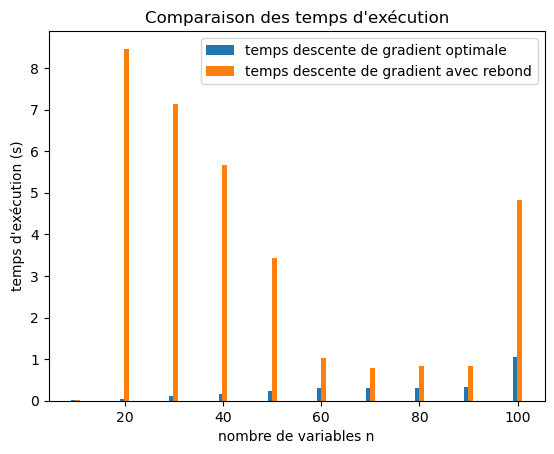

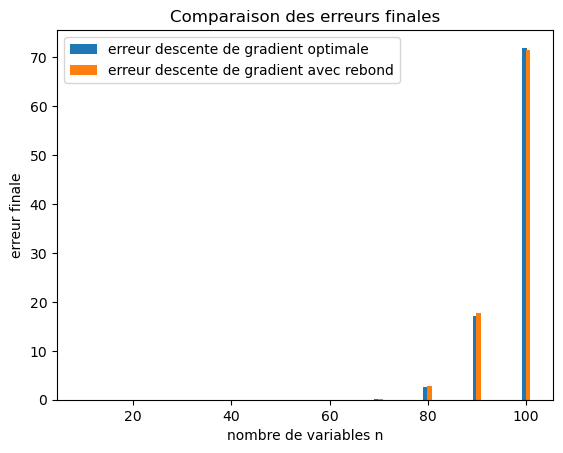

In [11]:
def poisson(n):
    diag = 2*np.ones(n)
    off_diag = -1*np.ones(n-1)
    A = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

    b = -1*np.ones((n,1))
    return A,b

c=np.random.uniform(0,10)
epsilon = 1e-6
debug = False
alpha = 0.1
beta = 0.7
temps_optimal = []
temps_rebond = []
erreurs_optimal = []
erreurs_rebond = []

for i in range(10,101,10):
    A,b = poisson(i)
    x0 = np.random.uniform(-5,5,size=(i,1))

    debut_optimal = time.perf_counter()
    Xk_opt, FXk_opt = desc_gradient_fquadra(x0, epsilon,A, f=lambda x: g(x,A,b,c), grad_f=lambda x: grad_g(x,A,b) )
    fin_optimal = time.perf_counter()
    temps_optimal.append(fin_optimal - debut_optimal)

    debut_rebond = time.perf_counter()
    Xk_rebond, FXk_rebond = desc_gradient_reb(x0, epsilon, alpha, beta, f=lambda x: g(x,A,b,c), gradf=lambda x: grad_g(x,A,b) )
    fin_rebond = time.perf_counter()
    temps_rebond.append(fin_rebond - debut_rebond)

    Xk_théorique = np.linalg.solve(A,b)
    erreurs_optimal.append(np.linalg.norm(Xk_opt[-1]-Xk_théorique))
    erreurs_rebond.append(np.linalg.norm(Xk_rebond[-1]-Xk_théorique))

x= np.arange(10,101,10)

plt.bar(x-0.4, temps_optimal, width=1, label="temps descente de gradient optimale")
plt.bar(x+0.4, temps_rebond, width=1, label="temps descente de gradient avec rebond")
plt.xlabel("nombre de variables n")
plt.ylabel("temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution")
plt.legend()
plt.show()

plt.bar(x-0.4, erreurs_optimal, width=1, label="erreur descente de gradient optimale")
plt.bar(x+0.4, erreurs_rebond, width=1, label="erreur descente de gradient avec rebond")
plt.xlabel("nombre de variables n")
plt.ylabel("erreur finale")
plt.title("Comparaison des erreurs finales")
plt.legend()
plt.show()
    

### EXERCICE 7:

#### QUESTION 1:
 l'exercice nous dit que $g(x) = Ax + b$ on a donc une matrice A et un vecteur b et 
 $$f(x) = \sum_{k=1}^{p} e^{\langle a^{(k)}, x \rangle + b_k}$$

 donc on a pour h la fonction :

 $$h(y) = \sum_{k=1}^{p} e^{y_k}$$

 et pour chaque $y^k$ on a le k-ieme ligne de la matrice A et le k_ieme element du vecteur b 

 #### QUESTION 2:
 
 on prend un terme générique de la somme $E_k(x) = e^{\langle a^{(k)},x\rangle+b_{k}}$. on dérive par rapport a x ce qui nous donne 

 $$\nabla E_k(x) = a^{(k)} \cdot e^{\langle a^{(k)},x\rangle+b_{k}}$$

 puis on somme pour tout les k ce qui donne :

 $$\nabla f(x) = \sum_{k=1}^{p} a^{(k)} e^{\langle a^{(k)},x\rangle+b_{k}}$$

 pour les dériver seconde on a la même forme que pour f avec simplement une constant $a^k$ en plus ce qui donne :

 $$\nabla^2 f(x) = \sum_{k=1}^{p} a^{(k)} (a^{(k)})^T e^{\langle a^{(k)},x\rangle+b_{k}}$$

 #### QUESTION 3:

 pour montrer que f est convexe il faut montrer que $\nabla^2 f(x) > 0$ or :
 $$e^{\langle a^{(k)},x\rangle+b_{k}} > 0$$
 donc il faut montrer que $a^{(k)} (a^{(k)})^T$ soit définie possitif :
 comme chaque element a est multiplier par lui même alors $a^{(k)} (a^{(k)})^T$ est toujours définie positive

 #### QUESTION 4:

 on a :
$$f(x)=e^{x_{1}+3x_{2}-0.1}+e^{x_{1}-3x_{2}-0.1}+e^{-x_{1}-0.1}$$

et on veut trouver A et b pour que ca correspond a :

$$f(x) = e^{\langle a^{(1)}, x \rangle + b_1} + e^{\langle a^{(2)}, x \rangle + b_2} + e^{\langle a^{(3)}, x \rangle + b_3}$$

on a donc en lisant les nombre sur la formule :
$$A = \begin{pmatrix} 1 & 3 \\ 1 & -3 \\ -1 & 0 \end{pmatrix} \quad \text{et} \quad b = \begin{pmatrix} -0.1 \\ -0.1 \\ -0.1 \end{pmatrix}$$

#### QUESTION 5:

pour que la fonction converge il faut :

- qu'elle soit $C^2$ ce qu'elle est car est une somme d'expodentielle 

- qu'elle soit convexe ce que l'on a vue dans la question 3

#### QUESTION 6:

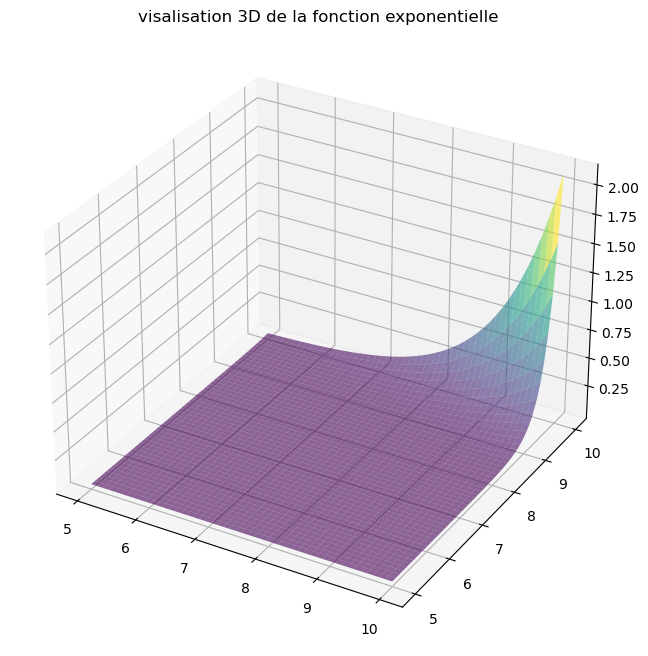

In [12]:
A = np.array([[1,3],[1,-3],[-1,0]])
b = np.array([-0.1,-0.1,-0.1])

def h(x):
    z = A @ x + b
    return np.sum(np.exp(z))

def dh(x):
    z = A@x +b
    return A.T @ np.exp(z)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

#creation du maillage
x_range = np.linspace(5,10,50)
y_range = np.linspace(5,10,50)
X,Y = np.meshgrid(x_range, y_range)

# calcul de g sur le plan
# comme A est diagonale on a que des terme carrée pour a et des terme simple pour b
Z = np.exp(X+3*Y-0.1)+np.exp(X-3*Y-0.1)+np.exp(-X-0.1)

#surface:
surf= ax.plot_surface(X,Y,Z, cmap='viridis', alpha=0.6)
ax.set_title(f"visalisation 3D de la fonction exponentielle")
ax.view_init(elev=30,azim=-60)
plt.show()

#### QUESTION 7:

In [13]:
def hess_h(x):
    z = A @ x + b
    return (A.T*np.exp(z))@A

#### QUESTION 8:

In [14]:
def desc_newton(x0, eps, alph, bet, f, gradf, hessf):
    max_iter = 100
    x = np.array(x0, dtype= float).flatten()
    Xk = [x]
    FXk = [f(x)]

    for k in range(max_iter):
        grad = gradf(x)
        if grad.ndim > 1:
            grad = grad.flatten()
        norm_grad = np.linalg.norm(grad)

        if norm_grad < eps:
            print("f converge a l'itération",k)
            break

        hess = hessf(x)
        try:
            d = np.linalg.solve(hess, -grad)
            d = d.flatten()
        except np.linalg.LinAlgError:
            print("la hessienne n'est pas inversible")
            break

        t=1
        pente_direction = np.dot(grad, d)
        if hasattr(pente_direction, 'item'):
             pente_direction = pente_direction.item()
        
        
        while f(x + t*d) > f(x) + alph*t*pente_direction:
            t = bet*t
            if t< 1e-10: break

        x = x+t*d
        Xk.append(x)
        FXk.append(f(x))
    else:
        print("nombre d'itération max atteint")
    return np.array(Xk), np.array(FXk)

#### QUESTION 9 :

f converge a l'itération 8
f converge a l'itération 36


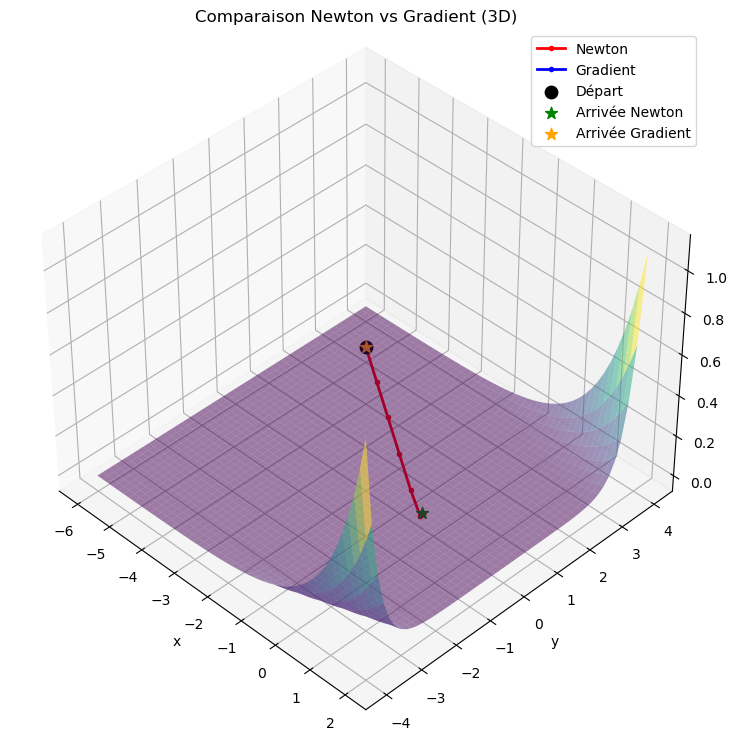

In [18]:
x0 = np.array([-5, 3])  
eps = 1e-6
alpha = 0.1
beta = 0.7

debut_newton = time.perf_counter()
Xk_newton, FXk_newton = desc_newton(x0, eps, alpha, beta, h, dh, hess_h)
fin_newton = time.perf_counter()
debut_rebond = time.perf_counter()
Xk_grad, FXk_grad = desc_gradient_reb(x0, eps, alpha, beta, h, dh)
fin_rebond = time.perf_counter()


Xk_newton = np.array([x.flatten() for x in Xk_newton if x.size == 2])
Xk_grad = np.array([x.flatten() for x in Xk_grad if x.size == 2])


FXk_newton = np.array(FXk_newton[:len(Xk_newton)]).flatten()
FXk_grad = np.array(FXk_grad[:len(Xk_grad)]).flatten()

# --- 3. Visualisation ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')


x_range = np.linspace(-6, 2, 50) 
y_range = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x_range, y_range)


Z = np.exp(X + 3*Y - 0.1) + np.exp(X - 3*Y - 0.1) + np.exp(-X - 0.1)

# Plot Surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5) # alpha réduit pour voir à travers

# Plot Trajectoires
ax.plot(Xk_newton[:,0], Xk_newton[:,1], FXk_newton, color='red', linewidth=2, marker='.', label='Newton')
ax.plot(Xk_grad[:,0], Xk_grad[:,1], FXk_grad, color='blue', linewidth=2, marker='.', label='Gradient')

# Plot Points Clés
ax.scatter(Xk_newton[0,0], Xk_newton[0,1], FXk_newton[0], color='black', s=80, label='Départ', zorder=10)
ax.scatter(Xk_newton[-1,0], Xk_newton[-1,1], FXk_newton[-1], color='green', s=80, marker='*', label='Arrivée Newton', zorder=10)
ax.scatter(Xk_grad[-1,0], Xk_grad[-1,1], FXk_grad[-1], color='orange', s=80, marker='*', label='Arrivée Gradient', zorder=10)

ax.set_title("Comparaison Newton vs Gradient (3D)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.view_init(elev=40, azim=-45) 

plt.show()


#### QUESTION 10:

In [19]:
print(f"Temps d'exécution Newton : {fin_newton - debut_newton:.6f} secondes")
print(f"Temps d'exécution Gradient avec rebond : {fin_rebond - debut_rebond:.6f} secondes")

Temps d'exécution Newton : 0.002573 secondes
Temps d'exécution Gradient avec rebond : 0.010073 secondes
